### Titinic: Machine Learning from Disaster
#### 타이타닉의 생존율 예측
- 문제를 정의
- 데이터 수집
- 데이터 탐색
- 피처 엔지니어링
- 모델링
- 평가

1. 문제 정의
- 생존율 예측하는 문제
- 어떤 승객이 생존할 수 있었는지
- (특정 데이터가 있을 때) 생존 유무를 예측

2. 데이터 수집
- kaggle 사이트 가입
- titanic data: train.csv, test.csv 다운

3. 데이터 읽어오기
- train 데이터에 읽어 오기
- 기본 데이터 파악
    - 어떻게 생겼는지, 구성은 어떻게 되었는지, 컬럼은 어떤 변수로 구성 되었는지
    - 결측치는 있는지

In [3]:
import pandas as pd

train = pd.read_csv("c:/sjjang/workspace/titanic_train.csv")

In [4]:
train.shape

(891, 12)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Data Dictionary
- Survived: 0 (생존하지 못함), 1 (생존)
- pclass: 승객 등급
- sibsp: 함께 탑승한 형제, 배우자의 수
- parch: 함께 탑승한 자녀, 부모의 수
- cabin: 객실 번호
- embarked: 탑승한 항구

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.isnull().sum() # 결측치(null)의 합

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### 4. 타이타닉 이미지 불러오기

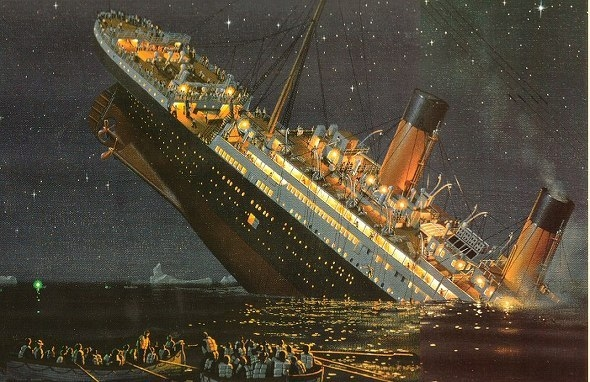

In [14]:
from IPython.display import Image
Image("c:/sjjang/workspace/titanic.jpg", width=300, height=250)

#### 5. 데이터 시각화 준비
- matplotlib, seaborn 라이브러리 import
- Categorical Features -> Bar Chart
    - Pclass, Sex, Sibsp, Embarked, Cabin

In [18]:
import matplotlib as plt
import seaborn as sns

#### 6. 성별, 생존유무의 인원수를 막대그래프로 그림
- X축 생존유무 (Survived/Dead)
- Y축 인원수
- 성별 (남/녀)

In [20]:
# survived:  생존자의 성별 인원 데이터
# dead: 사망자의 성별 인원 데이터
# df = dataFrame([survived, dead]) 데이터프레임 생성
# df.index = ["Survived", "Dead"]
# df.plot(kind="bar", stacked=True, figsize=(10,5))

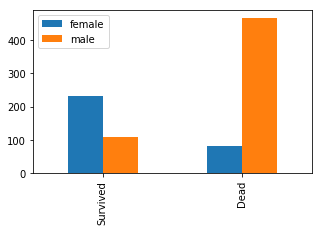

In [27]:
# 성별 생존유무 인원수 막대 그래프
survived = train[train["Survived"] == 1]["Sex"].value_counts()
dead = train[train["Survived"] == 0]["Sex"].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df.plot(kind="bar", figsize=(5,3))

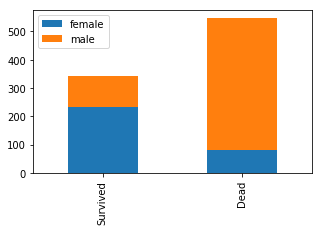

In [28]:
# 성별 생존유무 인원수 막대 그래프 (stacke = True 일 때)
survived = train[train["Survived"] == 1]["Sex"].value_counts()
dead = train[train["Survived"] == 0]["Sex"].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df.plot(kind="bar", stacked=True, figsize=(5,3))

In [29]:
# 사망자 > 생존자
# 생존율율 여 > 남
# 사망률 남 > 여

#### 7. (Pclass)객실 등급별, 생존유무의 인원수를 막대그래프로 그림
- X축 생존유무 (Survived/Dead)
- Y축 인원수
- Pclass(1,2,3)

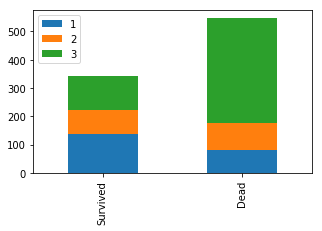

In [37]:
survived = train[train["Survived"] == 1]["Pclass"].value_counts()
dead = train[train["Survived"] == 0]["Pclass"].value_counts()
df = pd.DataFrame([subvived, dead])
df.index = ["Survived", "Dead"]
df.plot(kind="bar", stacked=True, figsize=(5,3))

In [38]:
# 생존율 1등석 > 3등석 > 2등석
# 사망률 3등석 > 2등석 > 1등석

#### 8. ?? 별, 생존유무의 인원수를 막대그래프를 그리는 함수 만들기
- bar_chart()

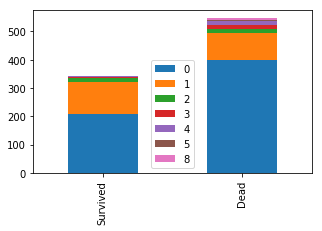

In [45]:
def bar_chart(feature):
    survived = train[train["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(5,3))

bar_chart("SibSp")

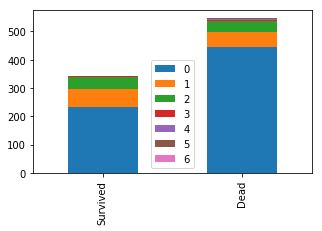

In [46]:
bar_chart("Parch")

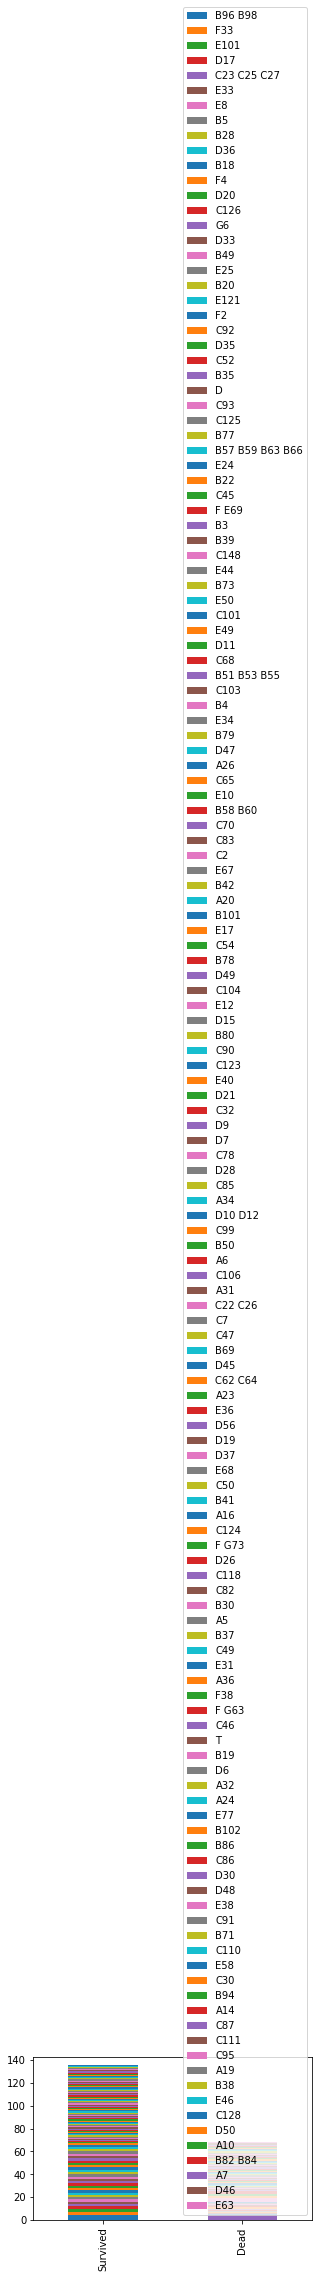

In [47]:
bar_chart("Cabin")

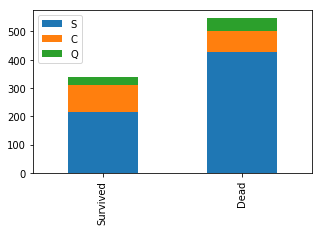

In [48]:
bar_chart("Embarked")